# Kütüphanelerin İmport edilmesi

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.impute import KNNImputer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

%matplotlib inline




# Veri Keşfi

In [278]:
df = pd.read_csv('data/congres-data.csv')

In [279]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Class Name                              435 non-null    object
 1   handicapped-infants                     435 non-null    object
 2   water-project-cost-sharing              435 non-null    object
 3   adoption-of-the-budget-resolution       435 non-null    object
 4   physician-fee-freeze                    435 non-null    object
 5   el-salvador-aid                         435 non-null    object
 6   religious-groups-in-schools             435 non-null    object
 7   anti-satellite-test-ban                 435 non-null    object
 8   aid-to-nicaraguan-contras               435 non-null    object
 9   mx-missile                              435 non-null    object
 10  immigration                             435 non-null    object
 11  synfue

# Veri Temizleme

In [281]:
ynmap = {'y':1, 'n':0, '?':np.nan} 
partymap = {'republican':1, 'democrat':0}
df['republican'] = df['Class Name'].map(partymap)
df.drop('Class Name', axis=1, inplace=True)

for column in df.columns.drop('republican'):
    df[column+'-new'] = df[column].map(ynmap)
    df.drop(column, axis=1, inplace=True)

In [282]:
df

,republican,handicapped-infants-new,water-project-cost-sharing-new,adoption-of-the-budget-resolution-new,physician-fee-freeze-new,el-salvador-aid-new,religious-groups-in-schools-new,anti-satellite-test-ban-new,aid-to-nicaraguan-contras-new,mx-missile-new,immigration-new,synfuels-corporation-cutback-new,education-spending-new,superfund-right-to-sue-new,crime-new,duty-free-exports-new,export-administration-act-south-africa-new
0,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,0,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
431,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
432,1,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,1,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0


In [284]:
imputer = KNNImputer(n_neighbors=2) 
df = imputer.fit_transform(data)
df = pd.DataFrame(df, columns = columns)

In [285]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col]).astype(int)

# Makine Öğrenmesi 

In [286]:
y = df['republican'].values #features
X = df.drop('republican', axis=1).values #target

In [287]:
print(X.shape)
print(y.shape)

(435, 16)
(435,)


In [288]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

In [289]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(304, 16)
(131, 16)
(304,)
(131,)


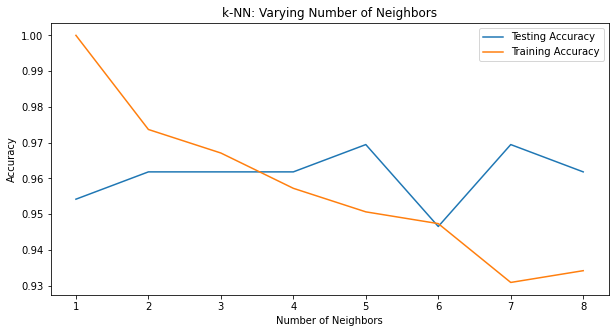

In [290]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
fig = plt.figure(figsize=(10,5))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [291]:
# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
model = knn.fit(X_train, y_train)

y_pred = model.predict(X_test)

knn.score(X_test, y_test)

0.9694656488549618

In [292]:
#predict custom data
X_new = np.array([[1,0,0,0,1,1,0,1,1,1,0,0,0,0,1,1],
                  [0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0]])

X_new.shape

(2, 16)

In [293]:
prediction = knn.predict(X_new)

# 1=Republic 0=Democrat
prediction

array([0, 1])

In [294]:
c_matrix = confusion_matrix(y_test, y_pred)

# TP- FN
# FP-TN
print(c_matrix)

[[79  1]
 [ 3 48]]


# Veri Görselleştirme

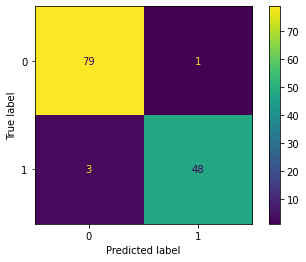

In [295]:
# Burada kullanılan görselleştirme methodlarının ileriki veriyonlarda başka paketlerde olabileceği yazmakta
# Bu cell error çıktısı verirse 
# ConfusionMatrixDisplay.from_predictions OR ConfusionMatrixDisplay.from_estimator.
# Bilgisini kullanabilir ya da en doğtu yol olarak sckit-learn dökümanlarına bakabilirsiniz

clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [296]:
corelation = df.corr()
corelation

,republican,handicapped-infants1,water-project-cost-sharing1,adoption-of-the-budget-resolution1,physician-fee-freeze1,el-salvador-aid1,religious-groups-in-schools1,anti-satellite-test-ban1,aid-to-nicaraguan-contras1,mx-missile1,immigration1,synfuels-corporation-cutback1,education-spending1,superfund-right-to-sue1,crime1,duty-free-exports1,export-administration-act-south-africa1
republican,1.000000,-0.396567,0.037295,-0.741874,0.924959,0.712230,0.435388,-0.521541,-0.662762,-0.615634,0.086813,-0.376631,0.714050,0.563344,0.637686,-0.551963,-0.402377
handicapped-infants1,-0.396567,1.000000,0.032170,0.386290,-0.412630,-0.358710,-0.397812,0.354940,0.384682,0.313555,-0.090806,0.105695,-0.422053,-0.348206,-0.378840,0.221499,0.278105
water-project-cost-sharing1,0.037295,0.032170,1.000000,-0.081480,0.090238,0.158476,0.146606,-0.225870,-0.143049,-0.214154,-0.135680,0.133095,0.015469,0.222500,-0.006123,-0.116207,-0.094396
adoption-of-the-budget-resolution1,-0.741874,0.386290,-0.081480,1.000000,-0.734239,-0.667541,-0.447201,0.606705,0.709375,0.609723,0.026140,0.211561,-0.677281,-0.557085,-0.604283,0.520822,0.471543
physician-fee-freeze1,0.924959,-0.412630,0.090238,-0.734239,1.000000,0.750375,0.472921,-0.578588,-0.699963,-0.627392,0.048608,-0.306056,0.725163,0.602681,0.667974,-0.565755,-0.454318
el-salvador-aid1,0.712230,-0.358710,0.158476,-0.667541,0.750375,1.000000,0.640140,-0.716109,-0.856038,-0.816129,-0.002283,-0.125439,0.647685,0.678154,0.715287,-0.600751,-0.455146
religious-groups-in-schools1,0.435388,-0.397812,0.146606,-0.447201,0.472921,0.640140,1.000000,-0.559308,-0.572157,-0.594958,0.098501,0.029232,0.511690,0.570800,0.593240,-0.472932,-0.316996
anti-satellite-test-ban1,-0.521541,0.354940,-0.225870,0.606705,-0.578588,-0.716109,-0.559308,1.000000,0.738687,0.677971,0.044253,0.034235,-0.559788,-0.587624,-0.530615,0.506231,0.518542
aid-to-nicaraguan-contras1,-0.662762,0.384682,-0.143049,0.709375,-0.699963,-0.856038,-0.572157,0.738687,1.000000,0.771420,0.035055,0.134216,-0.634088,-0.634797,-0.645770,0.555007,0.523600
mx-missile1,-0.615634,0.313555,-0.214154,0.609723,-0.627392,-0.816129,-0.594958,0.677971,0.771420,1.000000,0.029891,0.041635,-0.580715,-0.558732,-0.586188,0.499857,0.447813


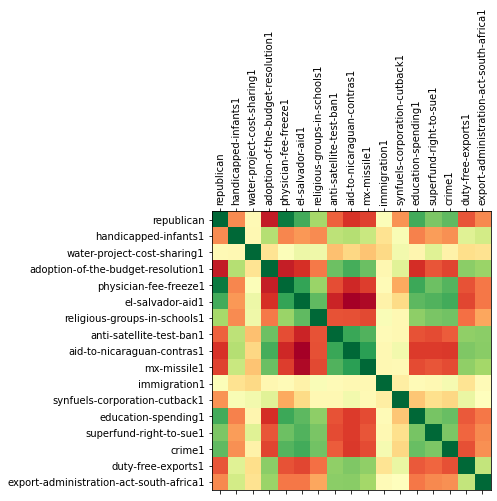

In [297]:
fig = plt.figure(figsize=(20,5))
plt.matshow(corelation, cmap= 'RdYlGn', fignum= fig.number)
plt.xticks(range(len(corelation.columns)), corelation.columns, rotation='vertical')
plt.yticks(range(len(corelation.columns)), corelation.columns)
plt.show()

In [301]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98        80
           1       0.98      0.94      0.96        51

    accuracy                           0.97       131
   macro avg       0.97      0.96      0.97       131
weighted avg       0.97      0.97      0.97       131



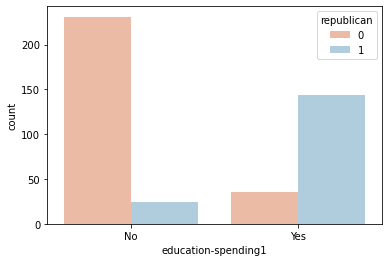

In [309]:
plt.figure()
sns.countplot(x='education-spending1', hue='republican', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

## İletişim
[Uzay Peker (LinkedIn)](https://www.linkedin.com/in/uzaypeker/)

[Uzay Peker (Github)](https://github.com/spacegondar)